In [38]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Natural Language Toolkit
import nltk
#Importing String for list of punctuations
import string
#Importing module for text corrections
import textblob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import roc_Curve, auc

#Importing stopwords list
from nltk.corpus import stopwords
#Importing Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
#Importing Tokenizer
from nltk.tokenize import RegexpTokenizer
#Importing TextBlob
from textblob import TextBlob

import os 

In [39]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\final_year project\daraz_reviews.csv',encoding="ISO-8859-1")
data

,Type,Product,Created At,Status,Rejection Reason,Rating,Platform,Origin of review,Review detail
0,PRODUCT_REVIEW,Beige Boat Island Suede Ballerinas,7/4/2022 14:54,approved,NaN,5,androidApp,NaN,NaN
1,PRODUCT_REVIEW,60cm x 3m Kitchen Aluminum Sticker Oil Proof W...,7/4/2022 16:12,approved,NaN,5,androidApp,NaN,thank u soo much daraz online ....im glad to b...
2,PRODUCT_REVIEW,Mellow Full Sleeve V Neck Tshirt For Women,7/4/2022 21:32,approved,NaN,5,iosApp,NaN,Quality best ??????<br/>Possibile xa vne aru c...
3,PRODUCT_REVIEW,Silicon Star Shaped Based Bathroom (Tub) Kitch...,7/4/2022 23:06,approved,NaN,4,androidApp,NaN,NaN
4,PRODUCT_REVIEW,Flite Brown Pu Slipper For Men PUG-501,7/4/2022 16:38,approved,NaN,5,androidApp,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9995,PRODUCT_REVIEW,TVS Genuine Engine Oil For RTR 2004v & RTR 160 4v,6/22/2022 13:10,approved,NaN,5,androidApp,NaN,Must be genuine... I have no idea to distingui...
9996,PRODUCT_REVIEW,"Bajaj Pulsar 150 New BS6 - BS4,BS3,BS2 - UV Pr...",6/22/2022 14:19,approved,NaN,5,iosApp,NaN,Little bit short for my ns. But according to p...
9997,PRODUCT_REVIEW,Luxurious 100% Cotton Striped 2 Piece Pillow Set,6/22/2022 14:52,approved,NaN,5,androidApp,NaN,good l
9998,PRODUCT_REVIEW,Goop Standard Mini Battery Charger,6/22/2022 13:11,approved,NaN,5,androidApp,NaN,"nice product, working properly as of now, let'..."


In [40]:
'''changing name of columns'''
data.rename(columns = {'Type':'type','Product':'product','Created At':'created_at','Status':'status','Rejection Reason':'rejection_reason','Rating':'rating','Platform':'platform','Review detail':'review_detail'}, inplace = True)
data

,type,product,created_at,status,rejection_reason,rating,platform,Origin of review,review_detail
0,PRODUCT_REVIEW,Beige Boat Island Suede Ballerinas,7/4/2022 14:54,approved,NaN,5,androidApp,NaN,NaN
1,PRODUCT_REVIEW,60cm x 3m Kitchen Aluminum Sticker Oil Proof W...,7/4/2022 16:12,approved,NaN,5,androidApp,NaN,thank u soo much daraz online ....im glad to b...
2,PRODUCT_REVIEW,Mellow Full Sleeve V Neck Tshirt For Women,7/4/2022 21:32,approved,NaN,5,iosApp,NaN,Quality best ??????<br/>Possibile xa vne aru c...
3,PRODUCT_REVIEW,Silicon Star Shaped Based Bathroom (Tub) Kitch...,7/4/2022 23:06,approved,NaN,4,androidApp,NaN,NaN
4,PRODUCT_REVIEW,Flite Brown Pu Slipper For Men PUG-501,7/4/2022 16:38,approved,NaN,5,androidApp,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9995,PRODUCT_REVIEW,TVS Genuine Engine Oil For RTR 2004v & RTR 160 4v,6/22/2022 13:10,approved,NaN,5,androidApp,NaN,Must be genuine... I have no idea to distingui...
9996,PRODUCT_REVIEW,"Bajaj Pulsar 150 New BS6 - BS4,BS3,BS2 - UV Pr...",6/22/2022 14:19,approved,NaN,5,iosApp,NaN,Little bit short for my ns. But according to p...
9997,PRODUCT_REVIEW,Luxurious 100% Cotton Striped 2 Piece Pillow Set,6/22/2022 14:52,approved,NaN,5,androidApp,NaN,good l
9998,PRODUCT_REVIEW,Goop Standard Mini Battery Charger,6/22/2022 13:11,approved,NaN,5,androidApp,NaN,"nice product, working properly as of now, let'..."


In [41]:
#droping null review text
data.dropna(subset = ['review_detail'], axis = 0, inplace = True)
data.reset_index(inplace = True, drop = True)

In [42]:
data.dtypes

type                 object
product              object
created_at           object
status               object
rejection_reason     object
rating                int64
platform             object
Origin of review    float64
review_detail        object
dtype: object

In [43]:
data['word_count'] = data['review_detail'].apply(lambda x: len(str(x).split(" ")))
data[['review_detail','word_count']].head(20)

,review_detail,word_count
0,thank u soo much daraz online ....im glad to b...,14
1,Quality best ??????<br/>Possibile xa vne aru c...,29
2,Thank you daraz and mansalu for this really go...,15
3,good quality ????,3
4,ramrai cha product maan paryo,5
5,it's so different than what you show in photo ...,15
6,Finally maile Mero Saman paye Ani taste ni Gar...,39
7,kastoo chartikala hoo Yoo daraz ko ...t shirt ...,60
8,Loved it..cheap yet best??,4
9,What I ordered and what i received. I ordered ...,52


In [44]:
set1 = []

for i in data.index:
    if data.rating[i]>3:
        set1.append('Good')
    else:
        set1.append('Bad')
data['rating_class'] = set1

#good = 1, bad = 0
data['binary_rating'] = 0
data.loc[data.rating_class == 'Good',['binary_rating']] = 1
data.head()

,type,product,created_at,status,rejection_reason,rating,platform,Origin of review,review_detail,word_count,rating_class,binary_rating
0,PRODUCT_REVIEW,60cm x 3m Kitchen Aluminum Sticker Oil Proof W...,7/4/2022 16:12,approved,NaN,5,androidApp,NaN,thank u soo much daraz online ....im glad to b...,14,Good,1
1,PRODUCT_REVIEW,Mellow Full Sleeve V Neck Tshirt For Women,7/4/2022 21:32,approved,NaN,5,iosApp,NaN,Quality best ??????<br/>Possibile xa vne aru c...,29,Good,1
2,PRODUCT_REVIEW,"Manaslu Danfe 26"" Tenor EQ Ukulele With Free Bag",7/4/2022 18:12,approved,NaN,5,androidApp,NaN,Thank you daraz and mansalu for this really go...,15,Good,1
3,PRODUCT_REVIEW,Combo of 1 Eyelash Curler And 2 Pair False Eye...,7/4/2022 13:45,approved,NaN,3,androidApp,NaN,good quality ????,3,Bad,0
4,PRODUCT_REVIEW,Buy One Get One Free Combo Of Navratna Cool Ta...,7/4/2022 13:19,approved,NaN,5,androidApp,NaN,ramrai cha product maan paryo,5,Good,1


5    3403
1     707
4     474
3     254
2     164
Name: rating, dtype: int64

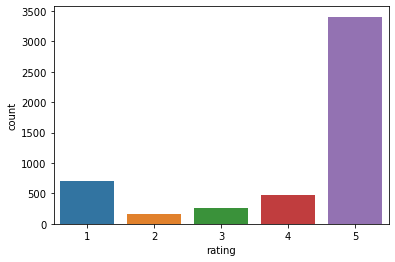

In [45]:
sns.countplot(x = 'rating', data = data)
data.rating.value_counts()

Good    3877
Bad     1125
Name: rating_class, dtype: int64

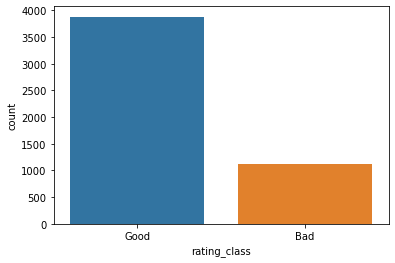

In [46]:
sns.countplot(x = "rating_class" , data = data)
data.rating_class.value_counts()


In [47]:
#products with highest review counts
data.groupby(['product'])['product'].agg(counts = 'count').reset_index().sort_values(by = 'counts',ascending = False)


,product,counts
3204,Router Backup Upto 8 Hours Mini Portable Modem...,13
1680,Hand Wrist Power Grip Strength Training Fitnes...,11
2028,LCD Writing Tablet 8.5 inch Electronic Writing...,10
3827,Ultima Beatz 355 Bluetooth Wireless Neckband U...,9
1687,Handy Stitch Portable Sewing Machine,8
...,...,...
1493,Gelish Harmony Soak-Off Primer Gel Polish - 15ml,1
1494,Gem Plastic Masala Box,1
1495,Gemei Gm-1719 Hair Dryer,1
1497,Gemei Gm-595 Waterproof 3 In 1 Hair Clipper A...,1


# Lowercasing


In [48]:
#lowercasing

data['edited_reviews'] = data['review_detail'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['edited_reviews'].head()


0    thank u soo much daraz online ....im glad to b...
1    quality best ??????<br/>possibile xa vne aru c...
2    thank you daraz and mansalu for this really go...
3                                    good quality ????
4                        ramrai cha product maan paryo
Name: edited_reviews, dtype: object

# Removing Punctuation

In [49]:
'''Removing Punctuation'''
data['edited_reviews'] = data['edited_reviews'].str.replace('[^\w\s]','')


data['edited_reviews'].head()

0    thank u soo much daraz online im glad to be se...
1    quality best brpossibile xa vne aru color ni s...
2    thank you daraz and mansalu for this really go...
3                                        good quality 
4                        ramrai cha product maan paryo
Name: edited_reviews, dtype: object

# Removing Stop Words

In [50]:
'''Removing stop words'''

from nltk.corpus import stopwords

stop = stopwords.words('english')
data['edited_reviews'] = data['edited_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


data['edited_reviews'].head()

0         thank u soo much daraz online im glad served
1    quality best brpossibile xa vne aru color ni s...
2    thank daraz mansalu really good ukulele sound ...
3                                         good quality
4                        ramrai cha product maan paryo
Name: edited_reviews, dtype: object

# Removing short words

In [51]:
data['edited_reviews'] = data['edited_reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data['edited_reviews'].head(5)

0                  thank much daraz online glad served
1    quality best brpossibile color stock rakhnus b...
2    thank daraz mansalu really good ukulele sound ...
3                                         good quality
4                            ramrai product maan paryo
Name: edited_reviews, dtype: object

# Removing Commonly Occuring Words

In [52]:
'''removing commonly occuring words'''
freq = pd.Series(' '.join(data['edited_reviews']).split()).value_counts()[:10]
freq = list(freq.index)

data['edited_reviews'] = data['edited_reviews'].apply(lambda x :" ".join(x for x in x.split() if x not in freq))
data['edited_reviews'].head()

0                              much online glad served
1    best brpossibile color stock rakhnus brbrekdam...
2            mansalu really ukulele sound also awesome
3                                                     
4                                    ramrai maan paryo
Name: edited_reviews, dtype: object

# Rare words removal

In [53]:
'''rare words removal'''

freq = pd.Series(' '.join(data['edited_reviews']).split()).value_counts()[-10:]

freq = list(freq.index)

data['edited_reviews'] = data['edited_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['edited_reviews'].head(6)

0                              much online glad served
1    best brpossibile color stock rakhnus brbrekdam...
2            mansalu really ukulele sound also awesome
3                                                     
4                                    ramrai maan paryo
5       different show photo thanks complementary gift
Name: edited_reviews, dtype: object

# Tokenize

In [54]:
'''tokenize'''
for x in data.index:
    data['edited_reviews'][x] = TextBlob(data['edited_reviews'][x]).words

data.edited_reviews.head()

0                         [much, online, glad, served]
1    [best, brpossibile, color, stock, rakhnus, brb...
2     [mansalu, really, ukulele, sound, also, awesome]
3                                                   []
4                                [ramrai, maan, paryo]
Name: edited_reviews, dtype: object

# Lemmatization

In [55]:
'''Lemmatization'''

lem = WordNetLemmatizer()


data['edited_reviews'] = data['edited_reviews'].apply(lambda x: ([lem.lemmatize(word, pos ='n') for word in x]))
data['edited_reviews'] = data['edited_reviews'].apply(lambda x: ([lem.lemmatize(word, pos = 'r') for word in x]))
data['edited_reviews'] = data['edited_reviews'].apply(lambda x :([lem.lemmatize(word, pos ='v') for word in x]))
data['edited_reviews'] = data['edited_reviews'].apply(lambda x: ([lem.lemmatize(word, pos = 'a') for word in x]))
data.edited_reviews.head(10)

0                          [much, online, glad, serve]
1    [best, brpossibile, color, stock, rakhnus, brb...
2     [mansalu, really, ukulele, sound, also, awesome]
3                                                   []
4                                [ramrai, maan, paryo]
5    [different, show, photo, thank, complementary,...
6    [finally, maile, mero, saman, paye, taste, gar...
7    [kastoo, chartikala, shirt, order, garya, katt...
8                                [love, itcheap, best]
9    [order, receive, order, lakme, shade, honey, p...
Name: edited_reviews, dtype: object

# Removing words without meaning

In [56]:
'''removing words without meaning'''
from nltk.corpus import wordnet
for i in data.index:
    only_recognized_words = []
    for t in data.edited_reviews[i]:
        if wordnet.synsets(t):
            if t.isalpha():
                only_recognized_words.append(t)
    data.edited_reviews[i] = only_recognized_words

data.edited_reviews.head(15)

0                           [much, online, glad, serve]
1             [best, color, stock, color, stock, order]
2               [really, ukulele, sound, also, awesome]
3                                                    []
4                                                    []
5     [different, show, photo, thank, complementary,...
6     [finally, saman, paye, taste, sugar, sugar, tara]
7     [shirt, order, bad, totally, disappoint, shirt...
8                                          [love, best]
9     [order, receive, order, shade, honey, package,...
10                       [excellent, really, beautiful]
11                                                   []
12                                        [find, break]
13    [delivery, late, overall, package, flavor, tas...
14                          [show, picture, disappoint]
Name: edited_reviews, dtype: object

In [57]:
'''joining data for model application'''
for i in data.index:
    data.edited_reviews[i] = ' '.join(data.edited_reviews[i])
   
    

In [58]:
f_data = data[['product','edited_reviews','rating','rating_class','binary_rating']]
f_data.head(15)

,product,edited_reviews,rating,rating_class,binary_rating
0,60cm x 3m Kitchen Aluminum Sticker Oil Proof W...,much online glad serve,5,Good,1
1,Mellow Full Sleeve V Neck Tshirt For Women,best color stock color stock order,5,Good,1
2,"Manaslu Danfe 26"" Tenor EQ Ukulele With Free Bag",really ukulele sound also awesome,5,Good,1
3,Combo of 1 Eyelash Curler And 2 Pair False Eye...,,3,Bad,0
4,Buy One Get One Free Combo Of Navratna Cool Ta...,,5,Good,1
5,Phone Charm,different show photo thank complementary gift,3,Bad,0
6,Poshilo Protein + Satu 800 gm,finally saman paye taste sugar sugar tara,5,Good,1
7,Combo Of 5 Half Sleeves T-Shirt For Men,shirt order bad totally disappoint shirt paint...,1,Bad,0
8,New Retro Rectangular Premium Sunglasses For W...,love best,5,Good,1
9,Lakme 9 to 5 Complexion Care CC Cream SPF 30 P...,order receive order shade honey package carele...,1,Bad,0


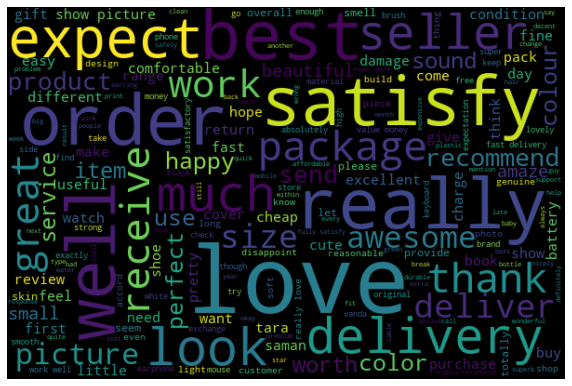

In [59]:
#wordCLoud
from wordcloud import WordCloud
positive_words = ' '.join([text for text in f_data[f_data.rating_class == 'Good']['edited_reviews']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 100).generate(positive_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

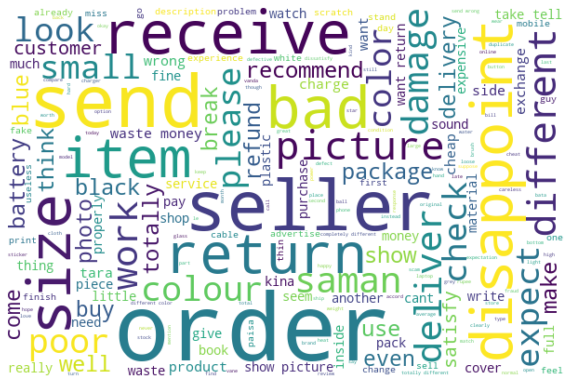

In [60]:
from wordcloud import WordCloud
negative_words = ' '.join([text for text in f_data[f_data.rating_class == 'Bad']['edited_reviews']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21,background_color="white", max_font_size = 100).generate(negative_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [61]:
#Text Polarity
f_data['Polarity'] = f_data['edited_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
f_data.head(5)

,product,edited_reviews,rating,rating_class,binary_rating,Polarity
0,60cm x 3m Kitchen Aluminum Sticker Oil Proof W...,much online glad serve,5,Good,1,0.350000
1,Mellow Full Sleeve V Neck Tshirt For Women,best color stock color stock order,5,Good,1,1.000000
2,"Manaslu Danfe 26"" Tenor EQ Ukulele With Free Bag",really ukulele sound also awesome,5,Good,1,0.533333
3,Combo of 1 Eyelash Curler And 2 Pair False Eye...,,3,Bad,0,0.000000
4,Buy One Get One Free Combo Of Navratna Cool Ta...,,5,Good,1,0.000000


In [159]:
print("Running sentiment process")
for row in f_data.itertuples():
    review = f_data.at[row[0], 'edited_reviews']
#run sentiment using TextBlob
    analysis = TextBlob(review)
#set value to dataframe
    f_data.at[row[0], 'polarity'] = analysis.sentiment[0]
    f_data.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        f_data.at[row[0], 'sentiment'] = "Positive"
    else:
        f_data.at[row[0], 'sentiment'] = "Negative"
   
        

Running sentiment process


In [160]:
data1 = f_data[["edited_reviews","polarity","sentiment"]]
data1


,edited_reviews,polarity,sentiment
0,much online glad serve,0.350000,Positive
1,best color stock color stock order,1.000000,Positive
2,really ukulele sound also awesome,0.533333,Positive
3,,0.000000,Negative
4,,0.000000,Negative
...,...,...,...
4997,item happy happy,0.800000,Positive
4998,must genuine idea distinguish container use au...,0.150000,Positive
4999,little short accord much buy third different e...,0.002083,Positive
5000,,0.000000,Negative


<AxesSubplot:ylabel='Frequency'>

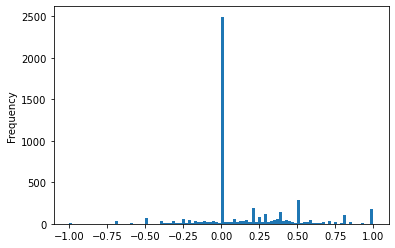

In [161]:
f_data['Polarity'].plot(kind='hist', bins=100)

# Train Test split for modeling

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, data1.sentiment, test_size=0.2, random_state=42 ,stratify=data1["sentiment"])

In [207]:
from sklearn.preprocessing import LabelEncoder

In [208]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [209]:
le1 = LabelEncoder()
y_test = le1.fit_transform(y_test)

In [210]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4001, 3) (4001,)
(1001, 3) (1001,)


In [211]:
vec = CountVectorizer()
vec.fit(X_train.edited_reviews)
train_x_bow = vec.transform(X_train.edited_reviews)
test_x_bow = vec.transform(X_test.edited_reviews)

In [212]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(4001, 2126)
(1001, 2126)


# Naive Bayes

In [213]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from collections import Counter
classfier = MultinomialNB()

In [214]:
alpha_ranges = {"alpha":[10**-2,10**-1,10**0,10**1,10**2]}
grid_search =GridSearchCV(classfier , param_grid = alpha_ranges ,scoring= "accuracy",cv=3,return_train_score = True)
grid_search.fit(train_x_bow,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [215]:
alpha = [10**-2,10**-1,10**0,10**1,10**2]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']
test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

In [216]:
grid_search.best_estimator_

MultinomialNB(alpha=10)

In [217]:
classifier = MultinomialNB(alpha=1)
classifier.fit(train_x_bow,y_train)

MultinomialNB(alpha=1)

In [218]:
predict = classifier.predict(test_x_bow)

In [219]:
print("accuracy is :",accuracy_score(y_test,predict))

accuracy is : 0.906093906093906


In [220]:
print("Accuracy is:")
print(classification_report(y_test,predict))


Accuracy is:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       610
           1       0.87      0.90      0.88       391

    accuracy                           0.91      1001
   macro avg       0.90      0.90      0.90      1001
weighted avg       0.91      0.91      0.91      1001



[[557  53]
 [ 41 350]]


<AxesSubplot:>

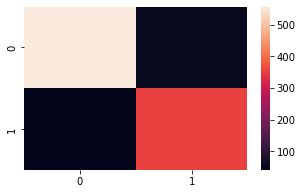

In [221]:
cm = confusion_matrix(y_test, predict)
print(cm)
plt.figure(figsize = (5,3))
sns.heatmap(cm)

In [222]:
from joblib import dump
dump(vec,"vectors.joblib")
dump(classifier,"model.joblib")

['model.joblib']

In [223]:
edited_reviews = ["i hate shirt"]
text_vec = vec.transform(edited_reviews)

classifier.predict(text_vec)

array([0])

In [224]:
le.inverse_transform([0])

array(['Negative'], dtype=object)

In [225]:
edited_reviews = ["this shirt fits me perfectly"]
text_vec = vec.transform(edited_reviews)

classifier.predict(text_vec)

array([1])

In [226]:
le.inverse_transform([1])

array(['Positive'], dtype=object)

# KNN

In [229]:

knn = KNeighborsClassifier(n_neighbors = 7)

clf = knn.fit(train_x_bow, y_train)

#input data to predict their classes of the given categories
predicted = clf.predict(test_x_bow)

In [230]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predicted = clf.predict(test_x_bow)
predicted_trn = clf.predict(train_x_bow)
print('Train Accuracy', accuracy_score(y_train, predicted_trn))
print('Test Accuracy', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))


Train Accuracy 0.8400399900024994
Test Accuracy 0.8321678321678322
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       610
           1       0.97      0.59      0.73       391

    accuracy                           0.83      1001
   macro avg       0.88      0.79      0.81      1001
weighted avg       0.86      0.83      0.82      1001



[[603   7]
 [161 230]]


<AxesSubplot:>

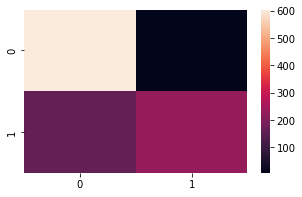

In [231]:
cm = confusion_matrix(y_test, predicted)
print(cm)
plt.figure(figsize = (5,3))
sns.heatmap(cm)

In [232]:
edited_reviews = ["i hate shirt"]
text_vec = vec.transform(edited_reviews)

knn.predict(text_vec)

array([0])

In [233]:
le.inverse_transform([0])

array(['Negative'], dtype=object)

In [234]:
edited_reviews = ["i love shirt"]
text_vec = vec.transform(edited_reviews)

knn.predict(text_vec)

array([1])

In [235]:
le.inverse_transform([0])

array(['Negative'], dtype=object)

In [236]:
from joblib import dump
dump(knn,"knnmodel.joblib")

['knnmodel.joblib']